In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["font.family"] = "sans-serif"

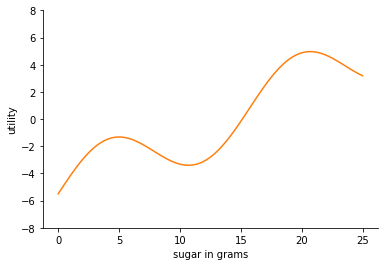

In [2]:
def f(x):
    return (np.sin(x / 2.5) * 6 + x) / 2.5 - 5.5


x_test = np.linspace(0, 25, 100).reshape(-1, 1)

plt.plot(x_test, f(x_test), c="C1", label="objective")

plt.ylim(-8, 8)
plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.show()

# real-valued data

(using Scikit-learn's implementation)

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF

from scipy.stats import norm

In [4]:
x_train = np.array([3, 12, 20]).reshape(-1, 1)
y_train = f(x_train)

In [5]:
x_train, y_train

(array([[ 3],
        [12],
        [20]]),
 array([[-2.06310619],
        [-3.09079506],
        [ 4.87445979]]))

In [4]:
gp = GPR(kernel=10 * RBF(length_scale=2.5), optimizer=None)

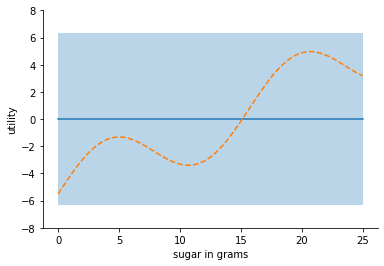

In [5]:
mean, sd = gp.predict(x_test, return_std=True)

plt.plot(x_test, mean, label="mean")
plt.fill_between(
    x_test.flatten(),
    mean.flatten() + 2 * sd,
    mean.flatten() - 2 * sd,
    alpha=0.3,
    label="95% CI",
)

plt.plot(x_test, f(x_test), c="C1", linestyle="--", label="objective")

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-8, 8)

plt.show()

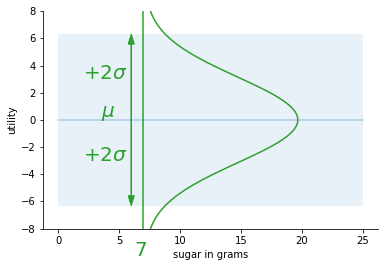

In [6]:
# step 1
plt.plot(x_test, mean, alpha=0.3, label="mean")
plt.fill_between(
    x_test.flatten(),
    mean.flatten() + 2 * sd,
    mean.flatten() - 2 * sd,
    alpha=0.1,
    label="95% CI",
)

x = 7
i = np.argmin(np.abs(x_test - x))
ys = np.linspace(-8, 8, 100)
pdfs = norm(loc=mean[i], scale=sd[i]).pdf(ys)

plt.axvline(7, c="C2")
plt.plot(x_test[i] + pdfs * 100, ys, c="C2")
plt.text(x - 0.75, -10, str(x), c="C2", fontsize=20)

plt.text(x - 3.5, mean[i] + 0.2, r"$\mu$", c="C2", fontsize=20)

plt.arrow(
    x - 1, mean[i], 0, 2 * sd[i], color="C2", head_width=0.5, length_includes_head=True
)
plt.text(x - 5, mean[i] + 3, r"$ + 2 \sigma$", c="C2", fontsize=20)

plt.arrow(
    x - 1, mean[i], 0, -2 * sd[i], color="C2", head_width=0.5, length_includes_head=True
)
plt.text(x - 5, mean[i] - 3, r"$ + 2 \sigma$", c="C2", fontsize=20)

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-8, 8)

plt.show()

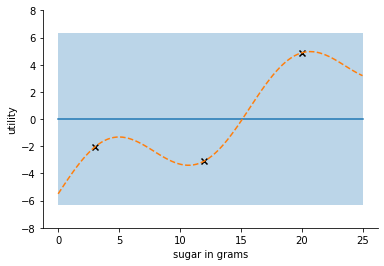

In [7]:
mean, sd = gp.predict(x_test, return_std=True)

plt.plot(x_test, mean, label="mean")
plt.fill_between(
    x_test.flatten(),
    mean.flatten() + 2 * sd,
    mean.flatten() - 2 * sd,
    alpha=0.3,
    label="95% CI",
)

plt.plot(x_test, f(x_test), c="C1", linestyle="--", label="objective")

plt.scatter(x_train, y_train, c="k", marker="x", label="observations")

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-8, 8)

plt.show()

In [8]:
gp.fit(x_train, y_train)

GaussianProcessRegressor(kernel=3.16**2 * RBF(length_scale=2.5), optimizer=None)

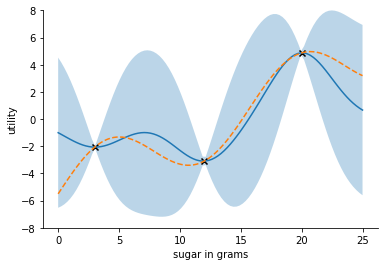

In [9]:
mean, sd = gp.predict(x_test, return_std=True)

plt.plot(x_test, mean, label="mean")
plt.fill_between(
    x_test.flatten(),
    mean.flatten() + 2 * sd,
    mean.flatten() - 2 * sd,
    alpha=0.3,
    label="95% CI",
)

plt.plot(x_test, f(x_test), c="C1", linestyle="--", label="objective")

plt.scatter(x_train, y_train, c="k", marker="x", label="observations")

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-8, 8)
# plt.legend()

plt.show()

/Users/quannguyen/anaconda3/envs/preference_botorch/lib/python3.9/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


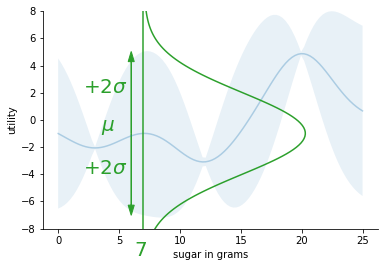

In [10]:
plt.plot(x_test, mean, label="mean", alpha=0.3)
plt.fill_between(
    x_test.flatten(),
    mean.flatten() + 2 * sd,
    mean.flatten() - 2 * sd,
    alpha=0.1,
    label="95% CI",
)

x = 7
i = np.argmin(np.abs(x_test - x))
ys = np.linspace(-8, 8, 100)
pdfs = norm(loc=mean[i], scale=sd[i]).pdf(ys)

plt.axvline(7, c="C2")
plt.plot(x_test[i] + pdfs * 100, ys, c="C2")
plt.text(x - 0.75, -10, str(x), c="C2", fontsize=20)

plt.text(x - 3.5, mean[i] + 0.2, r"$\mu$", c="C2", fontsize=20)

plt.arrow(
    x - 1, mean[i], 0, 2 * sd[i], color="C2", head_width=0.5, length_includes_head=True
)
plt.text(x - 5, mean[i] + 3, r"$ + 2 \sigma$", c="C2", fontsize=20)

plt.arrow(
    x - 1, mean[i], 0, -2 * sd[i], color="C2", head_width=0.5, length_includes_head=True
)
plt.text(x - 5, mean[i] - 3, r"$ + 2 \sigma$", c="C2", fontsize=20)

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-8, 8)

plt.show()

# pairwise comparisons

(using GPyTorch's implementation, with a few wrapper functions)

In [3]:
import torch
import gpytorch

import sys

sys.path.append("../")

from optimization.opt_utils import fit_model

In [6]:
x_train = torch.tensor([[3], [12], [20]]).float()
f(x_train)

tensor([[-2.0631],
        [-3.0908],
        [ 4.8745]])

In [12]:
comp_train = torch.tensor(
    [
        [0, 1],  # f(3) > f(12)
        [2, 0],  # f(3) < f(20)
        [2, 1],  # f(12) < f(20), which is redundant
    ]
).long()

In [14]:
model = fit_model(
    x_train,
    comp_train,
    covar_module=gpytorch.kernels.RBFKernel(
        lengthscale_constraint=gpytorch.constraints.GreaterThan(2.5)
    ),
)

/Users/quannguyen/anaconda3/envs/preference_botorch/lib/python3.9/site-packages/botorch/models/pairwise_gp.py:283: RuntimeWarning: X is not a p.d. matrix; Added jitter of 1.00e-05 to the diagonal
  warnings.warn(


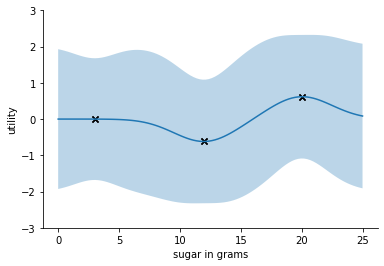

In [42]:
with torch.no_grad():
    output = model(torch.tensor(x_test))
    lower, upper = output.confidence_region()

plt.plot(x_test, output.mean, label="mean")
plt.fill_between(x_test.flatten(), lower, upper, alpha=0.3, label="CI")

with torch.no_grad():
    output = model(x_train)

for comp_ind in range(comp_train.shape[0]):
    tmp_comp = comp_train[comp_ind, :]

    plt.scatter(x_train[tmp_comp], output.mean[tmp_comp], marker="x", c="k")

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-3, 3)

plt.show()

In [43]:
x_train = torch.tensor([[3], [12], [20], [4], [11]]).float()

comp_train = torch.tensor(
    [
        [0, 1],  # f(3) > f(12)
        [2, 0],  # f(3) < f(20)
        [2, 1],  # f(12) < f(20)
        [2, 3],
        [2, 4],
    ]
).long()

model = fit_model(
    x_train,
    comp_train,
    covar_module=gpytorch.kernels.RBFKernel(
        lengthscale_constraint=gpytorch.constraints.GreaterThan(2.5)
    ),
)

/Users/quannguyen/anaconda3/envs/preference_botorch/lib/python3.9/site-packages/botorch/models/pairwise_gp.py:283: RuntimeWarning: X is not a p.d. matrix; Added jitter of 1.00e-05 to the diagonal
  warnings.warn(


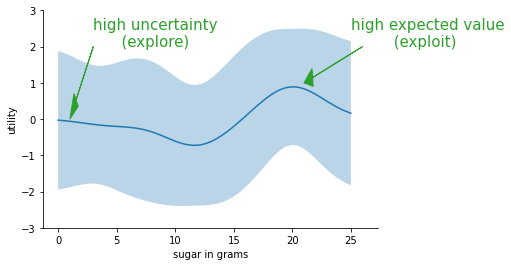

In [79]:
with torch.no_grad():
    output = model(torch.tensor(x_test))
    lower, upper = output.confidence_region()

plt.plot(x_test, output.mean, label="mean")
plt.fill_between(x_test.flatten(), lower, upper, alpha=0.3, label="CI")

plt.arrow(26, 2, -5, -1, color="C2", head_width=0.5, length_includes_head=True)
plt.text(25, 2, "high expected value\n         (exploit)", c="C2", fontsize=15)

plt.arrow(3, 2, -2, -2, color="C2", head_width=0.5, length_includes_head=True)
plt.text(3, 2, "high uncertainty\n      (explore)", c="C2", fontsize=15)

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-3, 3)

plt.show()

In [84]:
star_ind = np.argmax(output.mean.numpy())
x_star = x_test[star_ind]
y_star = output.mean.numpy()[star_ind]
x_star, y_star

(array([19.94949495]), 0.88804567)

/Users/quannguyen/anaconda3/envs/preference_botorch/lib/python3.9/site-packages/botorch/models/pairwise_gp.py:283: RuntimeWarning: X is not a p.d. matrix; Added jitter of 1.00e-05 to the diagonal
  warnings.warn(


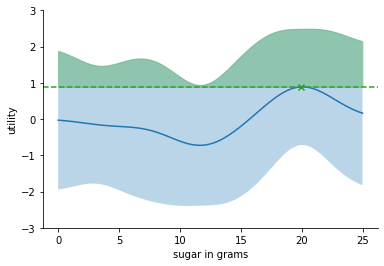

In [92]:
with torch.no_grad():
    output = model(torch.tensor(x_test))
    lower, upper = output.confidence_region()

plt.plot(x_test, output.mean, label="mean")
plt.fill_between(x_test.flatten(), lower, upper, alpha=0.3, label="CI")

star_ind = np.argmax(output.mean.numpy())
x_star = x_test[star_ind]
y_star = output.mean.numpy()[star_ind]

plt.scatter(x_star, y_star, c="C2", marker="x")
plt.axhline(y_star, c="C2", linestyle="--")

plt.fill_between(x_test.flatten(), upper, y_star, color="C2", alpha=0.3)

plt.xlabel("sugar in grams")
plt.ylabel("utility")
plt.ylim(-3, 3)

plt.show()